# IBM Data Science Professional Capstone Project
### Using Foursquare Date to Determine Best Neighborhood in Chicago to Open New Pizza Place
##### Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import geocoder
import requests
from pandas.io.json import json_normalize
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import json
from IPython.display import HTML, display

#### The first dataset I'll be using is a Chicago Neighborhood geojson dataset found on Kaggle:
[Source Link Here](https://www.kaggle.com/doyouevendata/chicago-community-areas-geojson/data#)

In [9]:
with open('chicago-community-areas.geojson') as json_data:
    geo_data = json.load(json_data)

In [3]:
geo_tab = pd.DataFrame.from_dict(geo_data['features'])

communities = []

for community in range(len(geo_tab)):
    name = geo_tab['properties'][community]['community']
    communities.append(name)

communities.sort()
communities

['ALBANY PARK',
 'ARCHER HEIGHTS',
 'ARMOUR SQUARE',
 'ASHBURN',
 'AUBURN GRESHAM',
 'AUSTIN',
 'AVALON PARK',
 'AVONDALE',
 'BELMONT CRAGIN',
 'BEVERLY',
 'BRIDGEPORT',
 'BRIGHTON PARK',
 'BURNSIDE',
 'CALUMET HEIGHTS',
 'CHATHAM',
 'CHICAGO LAWN',
 'CLEARING',
 'DOUGLAS',
 'DUNNING',
 'EAST GARFIELD PARK',
 'EAST SIDE',
 'EDGEWATER',
 'EDISON PARK',
 'ENGLEWOOD',
 'FOREST GLEN',
 'FULLER PARK',
 'GAGE PARK',
 'GARFIELD RIDGE',
 'GRAND BOULEVARD',
 'GREATER GRAND CROSSING',
 'HEGEWISCH',
 'HERMOSA',
 'HUMBOLDT PARK',
 'HYDE PARK',
 'IRVING PARK',
 'JEFFERSON PARK',
 'KENWOOD',
 'LAKE VIEW',
 'LINCOLN PARK',
 'LINCOLN SQUARE',
 'LOGAN SQUARE',
 'LOOP',
 'LOWER WEST SIDE',
 'MCKINLEY PARK',
 'MONTCLARE',
 'MORGAN PARK',
 'MOUNT GREENWOOD',
 'NEAR NORTH SIDE',
 'NEAR SOUTH SIDE',
 'NEAR WEST SIDE',
 'NEW CITY',
 'NORTH CENTER',
 'NORTH LAWNDALE',
 'NORTH PARK',
 'NORWOOD PARK',
 'OAKLAND',
 'OHARE',
 'PORTAGE PARK',
 'PULLMAN',
 'RIVERDALE',
 'ROGERS PARK',
 'ROSELAND',
 'SOUTH CHICAGO',

In [5]:
def embed_map(m):
    from IPython.display import IFrame

    m.save('index.html')
    return IFrame('index.html', width='100%', height='750px')

m = folium.Map(
    location=[41.84, -87.6298],
    zoom_start=10.5  # Limited levels of zoom for free Mapbox tiles.
)

folium.GeoJson(
    geo_data,
    name='geojson'
).add_to(m)

folium.LayerControl().add_to(m)

embed_map(m)

This dataset has boundary information for all of the Chicago community areas, and will be used to aid in any mapping visuals that I choose to generate.

#### The next dataset is Chicago community area demographic details provided by the state of Illinois:
[Source Link Here](https://datahub.cmap.illinois.gov/dataset/community-data-snapshots-raw-data)

In [6]:
chidemo = pd.read_csv('ReferenceCCAProfiles20132017.csv')
chidemo['GEOG']= chidemo['GEOG'].str.upper() #to match case of the geojson file
chidemo['GEOG'][55] = 'OHARE' #a couple mismatched names with the geojson
chidemo['GEOG'][65] = 'LOOP'
chidemo.head()

C:\Users\mkriv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkriv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,GEOG,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,A65_74,A75_84,...,highly_walkable_pop_pct,highly_walkable_emp_pct,assoc_plus_pct,in_lbr_frc_pct,pct_pop_access_4_acres_per_1k,pct_pop_access_10_acres_per_1k,impervious_acres_per_hh,modhigh_ta_pop_pct,modhigh_ta_emp_pct,nonsov_pct
0,ALBANY PARK,57655,51542,51992,13299,14031,11658,8134,2603,1573,...,1.000000,1.000000,0.390574,0.807084,0.000000,0.0,0.050373,1.0,1.0,0.499174
1,ARCHER HEIGHTS,12644,13393,13142,4017,2827,2925,1818,970,323,...,1.000000,0.796716,0.159882,0.805830,0.000000,0.0,0.270191,1.0,1.0,0.363994
2,ARMOUR SQUARE,12032,13391,13455,2634,2816,2376,2522,1540,1097,...,1.000000,1.000000,0.265896,0.798455,0.200206,0.0,0.097348,1.0,1.0,0.620298
3,ASHBURN,39584,41081,43792,12999,8377,9200,8567,3031,999,...,0.792998,0.621943,0.303683,0.787867,0.144637,0.0,0.153915,1.0,1.0,0.294516
4,AUBURN GRESHAM,55928,48743,46278,11696,9176,7871,9857,3810,2966,...,0.983347,0.995529,0.223910,0.698409,0.027726,0.0,0.084098,1.0,1.0,0.401112


In [7]:
chidemo.shape

(77, 231)

There are quite a few features here.  I'll ignore this for now, but it will be necessary to eliminate/consolidate a lot of this information.  Some will be correlated, and some will be just unuseful.

The GEOG field aligns with the pri_neigh field in the geojson file, so we'll be able to create some nice visuals with the neighborhood boundaries.

As one example of data available, we have total population for each community area- in this case just top 20

<function matplotlib.pyplot.show(*args, **kw)>

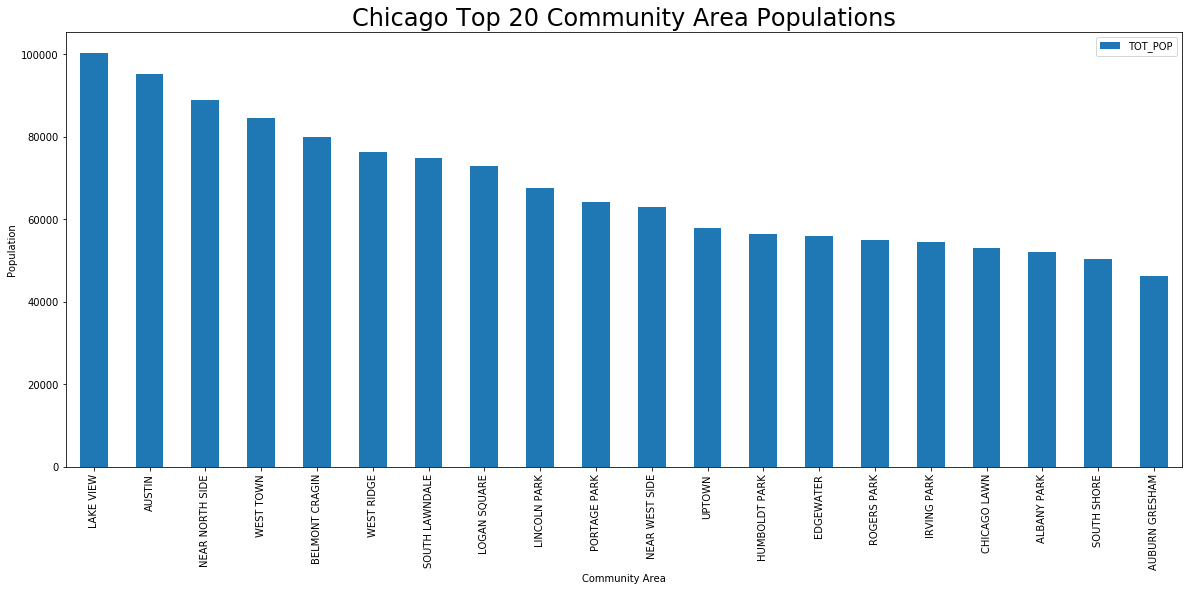

In [8]:
df_pop = chidemo[['GEOG','TOT_POP']].set_index('GEOG')
df_sorted = df_pop.sort_values(by='TOT_POP',ascending=False)
df_sorted.head(20).plot(kind = 'bar', figsize=(20,8))

plt.title('Chicago Top 20 Community Area Populations',size=24)
plt.xlabel('Community Area')
plt.ylabel('Population')

plt.show

### With this dataset we can build Choropleth maps, for example using total population as the discriminant:

In [8]:
def embed_map(m):
    from IPython.display import IFrame

    m.save('index.html')
    return IFrame('index.html', width='100%', height='750px')

chimap = folium.Map(location=[41.84, -87.6298], zoom_start=10.5)

folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=chidemo,
    columns=['GEOG','TOT_POP'],
    key_on='feature.properties.community',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Neighborhood Population'
).add_to(chimap)

# display map
embed_map(chimap)

#### Finally I'll also be using the Foursquare API to Obtain Venue Information for Each Neighborhood:
Before doing anything, I'll  need latitude and longitude data for each of the neighborhoods using geocoder:

In [9]:
def get_latlon(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    while(lat_lng_coords is None):
      g = geocoder.arcgis('{}, Chicago, IL'.format(neighborhood))
      lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude, longitude

lats = []
lons = []

hoods = chidemo['GEOG']

for hood in hoods:
    lat, lon = get_latlon(hood)
    lats.append(lat)
    lons.append(lon)
    
chidemo['Latitude'] = lats
chidemo['Longitude'] = lons
chidemo.head()

,GEOG,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,A65_74,A75_84,...,assoc_plus_pct,in_lbr_frc_pct,pct_pop_access_4_acres_per_1k,pct_pop_access_10_acres_per_1k,impervious_acres_per_hh,modhigh_ta_pop_pct,modhigh_ta_emp_pct,nonsov_pct,Latitude,Longitude
0,ALBANY PARK,57655,51542,51992,13299,14031,11658,8134,2603,1573,...,0.390574,0.807084,0.000000,0.0,0.050373,1.0,1.0,0.499174,41.96829,-87.72338
1,ARCHER HEIGHTS,12644,13393,13142,4017,2827,2925,1818,970,323,...,0.159882,0.805830,0.000000,0.0,0.270191,1.0,1.0,0.363994,41.81154,-87.72556
2,ARMOUR SQUARE,12032,13391,13455,2634,2816,2376,2522,1540,1097,...,0.265896,0.798455,0.200206,0.0,0.097348,1.0,1.0,0.620298,41.83458,-87.63189
3,ASHBURN,39584,41081,43792,12999,8377,9200,8567,3031,999,...,0.303683,0.787867,0.144637,0.0,0.153915,1.0,1.0,0.294516,41.74785,-87.70995
4,AUBURN GRESHAM,55928,48743,46278,11696,9176,7871,9857,3810,2966,...,0.223910,0.698409,0.027726,0.0,0.084098,1.0,1.0,0.401112,41.74319,-87.65504


Now I can start downloading the types of businesses in each of the neighborhoods, based off of the coordinates that I just collected:

[Foursquare API Explore Documentation](https://developer.foursquare.com/docs/api/venues/explore)

In [10]:
CLIENT_ID = 'FOCQLNFMFOSDND2KQIQQOKDJ3ZLGBBMJWX4P1O0EVZYOUX5H' # your Foursquare ID
CLIENT_SECRET = 'GTVOAKQIDEZDN5USLDMIVK1LS1CVOTZGSQYX0RCZCRBWUJOG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 10000
radius = 1609 #anything within a mile radius of a neighborhood will be considered accessible

def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
chicago_venues = getNearbyVenues(names=chidemo['GEOG'],
                                   latitudes=chidemo['Latitude'],
                                   longitudes=chidemo['Longitude'],
                                 radius = radius
                                  )

chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALBANY PARK,41.96829,-87.72338,Lawrence Fish Market,41.968280,-87.726250,Seafood Restaurant
1,ALBANY PARK,41.96829,-87.72338,Starbucks,41.968911,-87.728817,Coffee Shop
2,ALBANY PARK,41.96829,-87.72338,Chicago Kalbi Korean BBQ,41.968314,-87.722771,Korean Restaurant
3,ALBANY PARK,41.96829,-87.72338,Nighthawk,41.967974,-87.713415,Cocktail Bar
4,ALBANY PARK,41.96829,-87.72338,Ssyal Korean Restaurant and Ginseng House,41.968172,-87.733207,Korean Restaurant


In [11]:
chicago_venues.shape

(5725, 7)

##### We can look at how many venues we collected for each neighborhood:

In [41]:
cats = chicago_venues[['Neighborhood','Venue Category']].groupby('Venue Category').count().sort_values(by='Neighborhood',ascending=False)
cats.head(60)

,Neighborhood
Venue Category,
Mexican Restaurant,225
Sandwich Place,214
Pizza Place,205
Fast Food Restaurant,183
Park,176
Coffee Shop,156
Bar,152
Grocery Store,150
Discount Store,129


I don't think we've collected everything yet - looks like a hard limit of 100 for each neighborhood which seems low.  I'll address this.
##### I'm also interested in the unique categories that I collected:

In [13]:
np.sort(chicago_venues['Venue Category'].unique())

array(['ATM', 'Accessories Store', 'Afghan Restaurant',
       'African Restaurant', 'Airport', 'Airport Food Court',
       'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Amphitheater', 'Animal Shelter',
       'Antique Shop', 'Arcade', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Arts & Entertainment', 'Asian Restaurant',
       'Athletics & Sports', 'Auto Dealership', 'Automotive Shop',
       'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar',
       'Baseball Field', 'Baseball Stadium', 'Basketball Court',
       'Basketball Stadium', 'Beach', 'Bed & Breakfast', 'Beer Bar',
       'Beer Garden', 'Beer Store', 'Big Box Store',
       'Bike Rental / Bike Share', 'Bike Shop', 'Bike Trail', 'Bistro',
       'Boat or Ferry', 'Bookstore', 'Botanical Garden', 'Boutique',
       'Bowling Alley', 'Brazilian Restaurant', 'Breakfast Spot',
       'Brewery', 'Bubble Tea S

#### I think the best way to make sure I'm getting all venues for each neighborhood will be to construct a for loop that runs through the different venue categories that I've seen so far.

In [11]:
def getAllVenues(names, latitudes, longitudes, radius):
    queries = ['pizza',
               'restaurant',
                'store',
                'bar',
                'office',
                'gym',
                'shop',
                'entertainment',
                'recreation',
                'transportation',
                'sports',
                'park',
                'hotel',
                'grocery',
                'school',
                'club',
                'business',
                'travel',
                'salon',
                'studio',
                '']
    
    venues_list=[] 

    for name, lat, lng in zip(names, latitudes, longitudes):
        for query in queries:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                query)

            # make the GET request
            try:
                results = requests.get(url).json()["response"]['groups'][0]['items']
            except:
                print("Result exception found: ", name, ", ", query)
                continue

            # return only relevant information for each nearby venue
            try:
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],  
                    v['venue']['categories'][0]['name']) for v in results])
            except:
                print("Append exception found: ", name, " ", query)
                continue

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
all_venues = getAllVenues(names=chidemo['GEOG'],
                                   latitudes=chidemo['Latitude'],
                                   longitudes=chidemo['Longitude'],
                                 radius = radius
                                  )

Result exception found:  CHICAGO LAWN ,  transportation
Append exception found:  CLEARING   school
Result exception found:  EAST SIDE ,  entertainment
Result exception found:  EAST SIDE ,  school
Result exception found:  GREATER GRAND CROSSING ,  entertainment
Append exception found:  IRVING PARK   hotel
Append exception found:  SOUTH CHICAGO   bar
Append exception found:  SOUTH SHORE   salon
Append exception found:  WEST LAWN   park
Append exception found:  WEST TOWN   school


In [13]:
all_venues.shape

(31818, 7)

In [14]:
all_venues[['Venue','Neighborhood','Venue Category']].groupby('Neighborhood').count().sort_values(by='Venue Category',ascending=False)

,Venue,Venue Category
Neighborhood,,
NEW CITY,1610,1610
LOOP,1451,1451
NEAR NORTH SIDE,1406,1406
LAKE VIEW,1094,1094
LINCOLN PARK,996,996
WEST TOWN,877,877
UPTOWN,862,862
NORTH CENTER,771,771
LOGAN SQUARE,714,714


In [15]:
#because of the nature of the explore endpoint, there are bound to be numerous duplicates in the all venues df
final_venues = all_venues.drop_duplicates()
final_venues.shape

(23933, 7)

In [16]:
final_venues[['Neighborhood','Venue Category']].groupby('Venue Category').count().sort_values(by='Neighborhood',ascending=False)

,Neighborhood
Venue Category,
Salon / Barbershop,2050
Park,1020
Pizza Place,880
Bar,802
Grocery Store,647
School,570
Gym / Fitness Center,487
Gym,480
General Entertainment,472


In [17]:
#getting the all venue df took forever, so I will NEVER run that code again
final_venues.to_pickle('./all_venue_data.pkl')
chidemo.to_pickle('./chicago_neighborhoods.pkl')